## Introduction to the Data

#### Introduction

Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand. Tremors are common, but the disorder also commonly causes stiffness or slowing of movement.

In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.

Although Parkinson's disease can't be cured, medications might significantly improve your symptoms, so it's better to discover the symptoms earlier, so medications can swiftly begin.

#### The Dataset

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

Here are the Data dictionary for the Matrix column entries:

- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Since soft or slurred speech is highly a major early symptom for Parkinson's disease, a nuanced collection of biomedical voice measurements features is what I'll be using to predict if a person has symptoms of Parkinson's disease.


In this Project, I'll:

- Prepare the data for machine learning       
- Train a model using Logistic Regression and other Classifier models
- Measure the accuracy of the model 

## Exploring the Data

In [1]:
import pandas as pd
parkinsons = pd.read_csv("parkinsons.csv")
parkinsons.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [2]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

from the code block above, there is some inconsistencies between the values in the various columns:
- some range between 80-160
- some range between 0.00 - 0.0050, etc


##  Rescaling the Data

In [3]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
from sklearn.preprocessing import minmax_scale
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for col in columns:
    parkinsons[col + "_scaled"] = minmax_scale(parkinsons[col])
    

In [5]:
parkinsons = parkinsons.drop(columns, axis=1)

In [6]:
parkinsons

,name,status,MDVP:Fo(Hz)_scaled,MDVP:Fhi(Hz)_scaled,MDVP:Flo(Hz)_scaled,MDVP:Jitter(%)_scaled,MDVP:Jitter(Abs)_scaled,MDVP:RAP_scaled,MDVP:PPQ_scaled,Jitter:DDP_scaled,...,MDVP:APQ_scaled,Shimmer:DDA_scaled,NHR_scaled,HNR_scaled,RPDE_scaled,DFA_scaled,spread1_scaled,spread2_scaled,D2_scaled,PPE_scaled
0,phon_R01_S01_1,1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,phon_R01_S01_2,1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,phon_R01_S01_3,1,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,phon_R01_S01_4,1,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,phon_R01_S01_5,1,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
5,phon_R01_S01_6,1,0.187568,0.059232,0.278139,0.254130,0.288538,0.190270,0.352626,0.190079,...,0.193277,0.360829,0.036827,0.525766,0.370978,0.999128,0.672961,0.659218,0.339999,0.648753
6,phon_R01_S02_1,1,0.185909,0.071647,0.284086,0.052414,0.090909,0.041908,0.058950,0.042061,...,0.048396,0.062460,0.017252,0.668333,0.792079,0.756277,0.421385,0.565955,0.191959,0.346328
7,phon_R01_S02_2,1,0.110606,0.023873,0.223606,0.038755,0.090909,0.036609,0.048232,0.036442,...,0.041121,0.072089,0.008881,0.749858,0.888630,0.752890,0.324968,0.399458,0.285340,0.246912
8,phon_R01_S02_3,1,0.043063,0.061082,0.151289,0.121665,0.209486,0.108382,0.128617,0.108525,...,0.076422,0.119014,0.031989,0.543404,0.837604,0.794025,0.445910,0.723731,0.400034,0.387368
9,phon_R01_S02_4,1,0.039139,0.036658,0.148249,0.115629,0.209486,0.096339,0.128617,0.096163,...,0.132093,0.190012,0.030461,0.545436,0.677741,0.893130,0.533923,0.719740,0.449094,0.469780


## Finding Missing Values

In [7]:
parkinsons.isnull().sum()

name                       0
status                     0
MDVP:Fo(Hz)_scaled         0
MDVP:Fhi(Hz)_scaled        0
MDVP:Flo(Hz)_scaled        0
MDVP:Jitter(%)_scaled      0
MDVP:Jitter(Abs)_scaled    0
MDVP:RAP_scaled            0
MDVP:PPQ_scaled            0
Jitter:DDP_scaled          0
MDVP:Shimmer_scaled        0
MDVP:Shimmer(dB)_scaled    0
Shimmer:APQ3_scaled        0
Shimmer:APQ5_scaled        0
MDVP:APQ_scaled            0
Shimmer:DDA_scaled         0
NHR_scaled                 0
HNR_scaled                 0
RPDE_scaled                0
DFA_scaled                 0
spread1_scaled             0
spread2_scaled             0
D2_scaled                  0
PPE_scaled                 0
dtype: int64

In [8]:
parkinsons.notnull().sum()

name                       195
status                     195
MDVP:Fo(Hz)_scaled         195
MDVP:Fhi(Hz)_scaled        195
MDVP:Flo(Hz)_scaled        195
MDVP:Jitter(%)_scaled      195
MDVP:Jitter(Abs)_scaled    195
MDVP:RAP_scaled            195
MDVP:PPQ_scaled            195
Jitter:DDP_scaled          195
MDVP:Shimmer_scaled        195
MDVP:Shimmer(dB)_scaled    195
Shimmer:APQ3_scaled        195
Shimmer:APQ5_scaled        195
MDVP:APQ_scaled            195
Shimmer:DDA_scaled         195
NHR_scaled                 195
HNR_scaled                 195
RPDE_scaled                195
DFA_scaled                 195
spread1_scaled             195
spread2_scaled             195
D2_scaled                  195
PPE_scaled                 195
dtype: int64

## Data Engineering and Processing

The dataset is composed of a range of biomedical voice measurements from 32 people, 24 with Parkinson's disease.

Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column).

The rows of the CSV file contain an instance corresponding to one voice recording.

There are six(6) recordings per patient, the name of the patient is identified in the first column.

- so *phon_R01_S01_1* & *phon_R01_S01_3* are the same patient's recordings and,
- *phon_R01_S01_1* & *phon_R01_S02_3* are differnt patient recordings

Using Regrex funtion, I'll categorize the name column

In [9]:
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S01\w"), "name"] = "Patient_1"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S02\w"), "name"] = "Patient_2"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S04\w"), "name"] = "Patient_3"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S05\w"), "name"] = "Patient_4"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S06\w"), "name"] = "Patient_5"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S07\w"), "name"] = "Patient_6"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S08\w"), "name"] = "Patient_7"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S10\w"), "name"] = "Patient_8"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S13\w"), "name"] = "Patient_9"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S16\w"), "name"] = "Patient_10"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S17\w"), "name"] = "Patient_11"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S18\w"), "name"] = "Patient_12"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S19\w"), "name"] = "Patient_13"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S20\w"), "name"] = "Patient_14"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S21\w"), "name"] = "Patient_15"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S22\w"), "name"] = "Patient_16"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S24\w"), "name"] = "Patient_17"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S25\w"), "name"] = "Patient_18"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S26\w"), "name"] = "Patient_19"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S27\w"), "name"] = "Patient_20"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S31\w"), "name"] = "Patient_21"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S32\w"), "name"] = "Patient_22"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S33\w"), "name"] = "Patient_23"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S34\w"), "name"] = "Patient_24"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S35\w"), "name"] = "Patient_25"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S37\w"), "name"] = "Patient_26"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S39\w"), "name"] = "Patient_27"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S42\w"), "name"] = "Patient_28"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S43\w"), "name"] = "Patient_29"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S44\w"), "name"] = "Patient_30"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S49\w"), "name"] = "Patient_31"
parkinsons.loc[parkinsons.name.str.contains("phon_R01_S50\w"), "name"] = "Patient_32"

In [10]:
parkinsons

,name,status,MDVP:Fo(Hz)_scaled,MDVP:Fhi(Hz)_scaled,MDVP:Flo(Hz)_scaled,MDVP:Jitter(%)_scaled,MDVP:Jitter(Abs)_scaled,MDVP:RAP_scaled,MDVP:PPQ_scaled,Jitter:DDP_scaled,...,MDVP:APQ_scaled,Shimmer:DDA_scaled,NHR_scaled,HNR_scaled,RPDE_scaled,DFA_scaled,spread1_scaled,spread2_scaled,D2_scaled,PPE_scaled
0,Patient_1,1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,Patient_1,1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,Patient_1,1,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,Patient_1,1,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,Patient_1,1,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
5,Patient_1,1,0.187568,0.059232,0.278139,0.254130,0.288538,0.190270,0.352626,0.190079,...,0.193277,0.360829,0.036827,0.525766,0.370978,0.999128,0.672961,0.659218,0.339999,0.648753
6,Patient_2,1,0.185909,0.071647,0.284086,0.052414,0.090909,0.041908,0.058950,0.042061,...,0.048396,0.062460,0.017252,0.668333,0.792079,0.756277,0.421385,0.565955,0.191959,0.346328
7,Patient_2,1,0.110606,0.023873,0.223606,0.038755,0.090909,0.036609,0.048232,0.036442,...,0.041121,0.072089,0.008881,0.749858,0.888630,0.752890,0.324968,0.399458,0.285340,0.246912
8,Patient_2,1,0.043063,0.061082,0.151289,0.121665,0.209486,0.108382,0.128617,0.108525,...,0.076422,0.119014,0.031989,0.543404,0.837604,0.794025,0.445910,0.723731,0.400034,0.387368
9,Patient_2,1,0.039139,0.036658,0.148249,0.115629,0.209486,0.096339,0.128617,0.096163,...,0.132093,0.190012,0.030461,0.545436,0.677741,0.893130,0.533923,0.719740,0.449094,0.469780


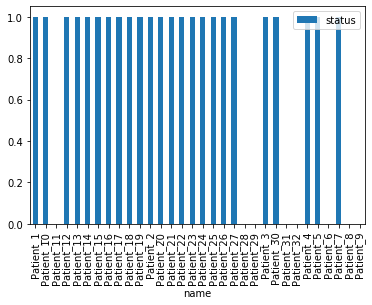

<Figure size 1440x864 with 0 Axes>

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
patient_name_pivot = parkinsons.pivot_table(index="name",values="status")
patient_name_pivot.plot.bar()
plt.figure(figsize=(20,12))
plt.show()

## Finding Relevant Columns



Our target column is the *status* column

In [23]:
parkinsons.corr()["status"]

status                     1.000000
MDVP:Fo(Hz)_scaled        -0.383535
MDVP:Fhi(Hz)_scaled       -0.166136
MDVP:Flo(Hz)_scaled       -0.380200
MDVP:Jitter(%)_scaled      0.278220
MDVP:Jitter(Abs)_scaled    0.338653
MDVP:RAP_scaled            0.266668
MDVP:PPQ_scaled            0.288698
Jitter:DDP_scaled          0.266646
MDVP:Shimmer_scaled        0.367430
MDVP:Shimmer(dB)_scaled    0.350697
Shimmer:APQ3_scaled        0.347617
Shimmer:APQ5_scaled        0.351148
MDVP:APQ_scaled            0.364316
Shimmer:DDA_scaled         0.347608
NHR_scaled                 0.189429
HNR_scaled                -0.361515
RPDE_scaled                0.308567
DFA_scaled                 0.231739
spread1_scaled             0.564838
spread2_scaled             0.454842
D2_scaled                  0.340232
PPE_scaled                 0.531039
Name: status, dtype: float64

Most of the columns are highly correlated, so a Regression Model can be applied here

In [24]:
parkinsons_features = parkinsons.drop(["status", "name"], axis=1)

I'll use a sci-kit library, called RFECV, to select most relevant columns that yield higher accuracy - it uses a recursion technique 

In [27]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression


cols = parkinsons_features
all_X = parkinsons_features
all_y = parkinsons["status"]
lr = LogisticRegression()
selector = RFECV(lr,cv=5)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]
print(optimized_columns)

Index(['MDVP:Fo(Hz)_scaled', 'MDVP:Fhi(Hz)_scaled', 'MDVP:Flo(Hz)_scaled',
       'MDVP:Shimmer_scaled', 'Shimmer:APQ3_scaled', 'spread1_scaled',
       'spread2_scaled', 'D2_scaled', 'PPE_scaled'],
      dtype='object')


## Picking an Error Metric

Now I have gotten the relevant features from the data, I'll dive into into predicting status with machine learning, but before I'll do that, I need to choose an error metric

An error metric will aid in figure out when the model is performing well, and when it's performing poorly - in this case, if our algorithm is predicting all cases of Parkinsons disease (sensitivity) or not.

- Building a model to predict which patients have Parkinsons disease (knowing the adverse effects of not detecting the symptoms earlier), every patient that is missed by the model could mean a loss of life. 

- I want a highly sensitive model that is able to "catch" all of the positive cases (in this case, the positive case is a patient with Parkinson's disease).

I'll use metrics that tell us the number of false positives and false negatives, since it's give a more granular representation of errors than other metrics

## Training a Model with a LogisticRegression Model

LogisticRegression Models are used for Classifier Regression systems


In [29]:
print(parkinsons["status"].value_counts())

1    147
0     48
Name: status, dtype: int64


There seem to be some class imbalance in the target column, and this can lead to a strong bias towards predicting for the majority class

To combat this, set the class_weight to balanced

In [30]:
X = parkinsons_features[optimized_columns]
Y = parkinsons["status"]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(class_weight="balanced")
predictions = cross_val_predict(lr, X, Y, cv=5)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (parkinsons["status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (parkinsons["status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (parkinsons["status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (parkinsons["status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.7891156462585034
0.4583333333333333


- The Model is good at identiying or detecting Parkinsons patient - it's true positive rate (tpr) was 78.9%
- This is like around 4 of 20 people are going undiagnosed (being classified as false negatives).

And since we want less people to go undiagnosed, I'll have to increase tpr, by further by assigning a harsher penalty for misclassifying the positive class.

In [34]:
penalty = {
    0: 8,
    1: 7
}

X = parkinsons_features[optimized_columns]
Y = parkinsons["status"]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, X, Y, cv=5)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (parkinsons["status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (parkinsons["status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (parkinsons["status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (parkinsons["status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.9319727891156463
0.5


The tpr improved to 93% and fpr 50%
- now atleast 15 out of 16 people are correctly diagnosed for Parkinson's and just a fraction of 1 person is not correctly diagnosed

The Model is doing well!!

I'll try another Machine Learning, to check whether the current model performance can be optimized 

## Training a Model with RandomForestClassifier Model

In [35]:
X = parkinsons_features[optimized_columns]
Y = parkinsons["status"]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
predictions = cross_val_predict(rf, X, Y, cv=5)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (parkinsons["status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (parkinsons["status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (parkinsons["status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (parkinsons["status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.9319727891156463
0.6041666666666666


- The model had the same tpr as the LogisticRegression Model
- But the fpr improved from 50% to about 60% - leading to reduction in false diagnosis 